# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 241


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
#Set the API Base URL
units = "metric"
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather['main']["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     #If an error is experienced, skip the city
    except:
         print("City not found. Skipping...")
         pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fale old settlement
Processing Record 2 of Set 1 | sao felix do xingu
Processing Record 3 of Set 1 | ahau
City not found. Skipping...
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | puerto deseado
Processing Record 7 of Set 1 | lorengau
Processing Record 8 of Set 1 | tame
Processing Record 9 of Set 1 | maintirano
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | portland
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          234
Lat           234
Lng           234
Max Temp      234
Humidity      234
Cloudiness    234
Wind Speed    234
Country       234
Date          234
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fale old settlement,-9.3852,-171.2468,28.09,75,8,5.22,TK,1724807787
1,sao felix do xingu,-6.6447,-51.9950,29.79,30,100,0.66,BR,1724807788
2,ancud,-41.8697,-73.8203,5.03,88,70,2.41,CL,1724807791
3,grytviken,-54.2811,-36.5092,3.20,84,100,3.70,GS,1724807792
4,puerto deseado,-47.7503,-65.8938,6.11,65,98,7.99,AR,1724807793


In [30]:
# Create the output_data directory if it doesn't exist
os.makedirs("output_data", exist_ok=True)

In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fale old settlement,-9.3852,-171.2468,28.09,75,8,5.22,TK,1724807787
1,sao felix do xingu,-6.6447,-51.9950,29.79,30,100,0.66,BR,1724807788
2,ancud,-41.8697,-73.8203,5.03,88,70,2.41,CL,1724807791
3,grytviken,-54.2811,-36.5092,3.20,84,100,3.70,GS,1724807792
4,puerto deseado,-47.7503,-65.8938,6.11,65,98,7.99,AR,1724807793


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

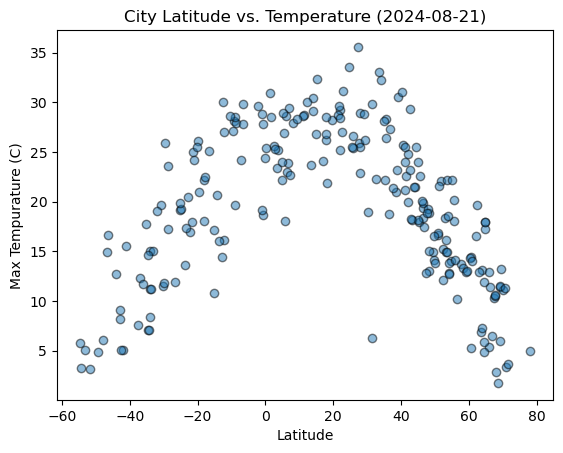

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter (
    x = city_data_df['Lat'],
    y = city_data_df['Max Temp'],
    edgecolor = "black",
    alpha=0.5
)
# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature (2024-08-21)')
plt.xlabel("Latitude")
plt.ylabel('Max Tempurature (C)')
plt.grid = True
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

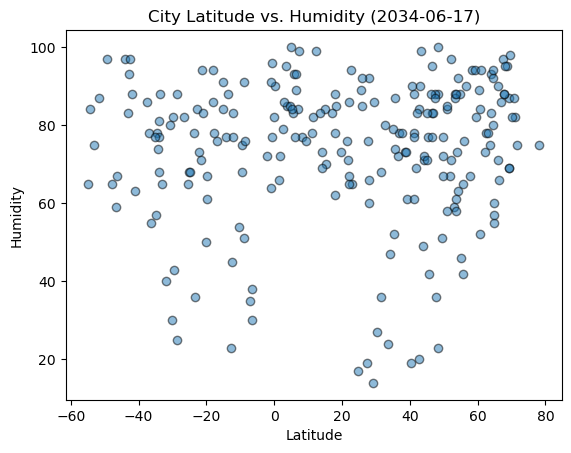

In [34]:
# Build scatter plot for latitude vs. Humidity
plt.scatter (
x = city_data_df['Lat'],
y = city_data_df['Humidity'],
edgecolor = "black",
alpha=0.5
)
# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2034-06-17)')
plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.grid = True
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

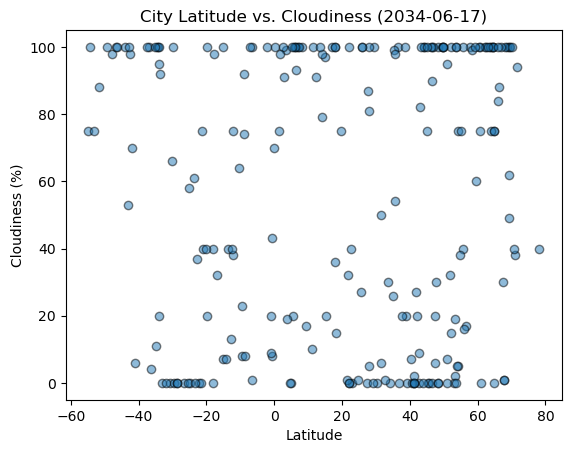

In [35]:
# Build scatter plot for city latitude vs. cloudiness
plt.scatter (
x = city_data_df['Lat'],
y = city_data_df['Cloudiness'],
edgecolor = "black",
alpha=0.5
)
# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2034-06-17)')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.grid = True
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

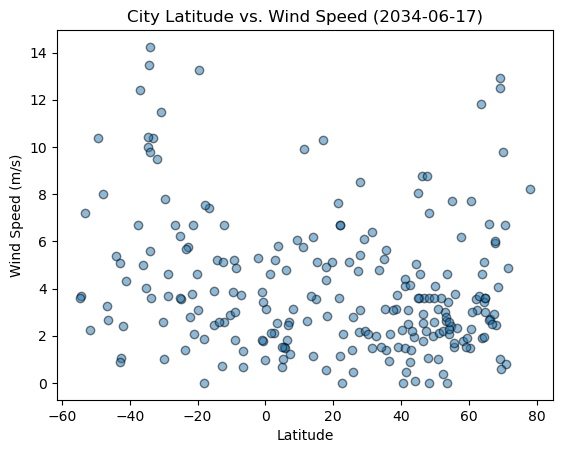

In [36]:
# Build scatter plot for city latitude vs. wind speed plot
plt.scatter (
x = city_data_df['Lat'],
y = city_data_df['Wind Speed'],
edgecolor = "black",
alpha=0.5
)
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2034-06-17)')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.grid = True
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def build_my_plots(df, weather_variable):
    x_values = df['Lat']
    y_values = df[weather_variable]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(weather_variable)
    print(f"The r-sqaure is: {rvalue**2}")
    plt.show()

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,tame,6.4610,-71.7300,22.95,89,100,1.84,CO,1724807796
8,bethel,41.3712,-73.4140,22.59,88,0,0.45,US,1724807798
9,hamilton,39.1834,-84.5333,30.56,61,0,1.54,US,1724807800
10,udachny,66.4167,112.4000,11.37,66,88,2.71,RU,1724807801
11,qaqortoq,60.7167,-46.0333,5.25,84,100,2.27,GL,1724807802


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fale old settlement,-9.3852,-171.2468,28.09,75,8,5.22,TK,1724807787
1,sao felix do xingu,-6.6447,-51.9950,29.79,30,100,0.66,BR,1724807788
2,ancud,-41.8697,-73.8203,5.03,88,70,2.41,CL,1724807791
3,grytviken,-54.2811,-36.5092,3.20,84,100,3.70,GS,1724807792
4,puerto deseado,-47.7503,-65.8938,6.11,65,98,7.99,AR,1724807793


###  Temperature vs. Latitude Linear Regression Plot

The r-sqaure is: 0.6186499584736862


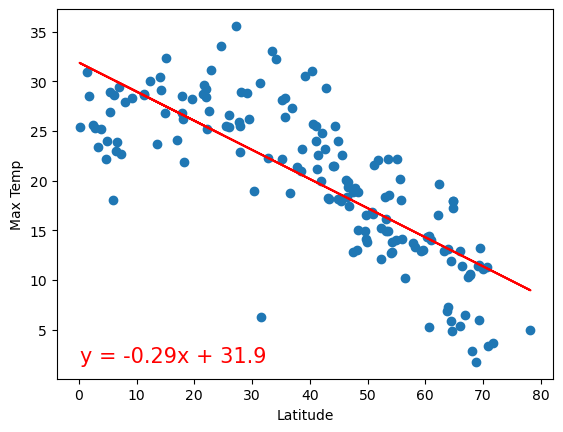

In [40]:
# Linear regression on Northern Hemisphere
build_my_plots(northern_hemi_df, 'Max Temp')

The r-sqaure is: 0.6419608383792863


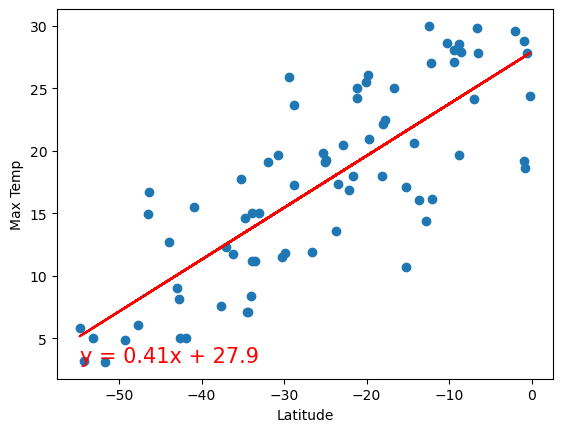

In [41]:
# Linear regression on Southern Hemisphere
build_my_plots(southern_hemi_df, 'Max Temp')

**Discussion about the linear relationship:** Predictions in the linear regression plots show that the higher the latitude in the northern hemisphere the lower the Temperatures. In the Southern hemisphere the higher the Latitude the higher the temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-sqaure is: 2.3960474205415743e-05


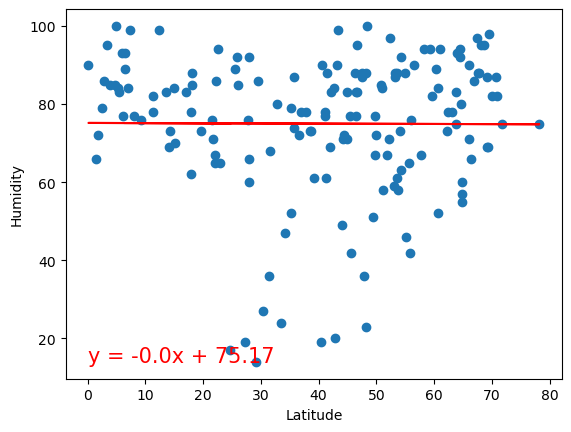

In [42]:
# Northern Hemisphere
build_my_plots(northern_hemi_df, 'Humidity')

The r-sqaure is: 0.02234365529644125


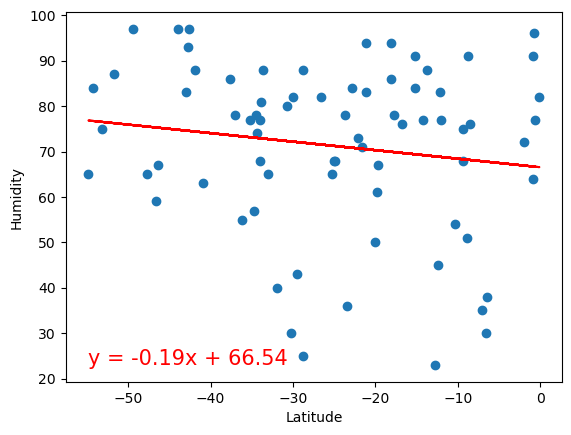

In [43]:
# Southern Hemisphere
build_my_plots(southern_hemi_df, 'Humidity')

**Discussion about the linear relationship:** In the linear regression plots above we can see in the Northern Hemisphere the Humidity has a strong correlation when Latitude increase Humidity is still high but will slowly drop. Meanwhile the Southern Hemisphere as Latitude increases Humidity decrease more significantly and isn't as strong correlated.

### Cloudiness vs. Latitude Linear Regression Plot

The r-sqaure is: 0.00010577655862379399


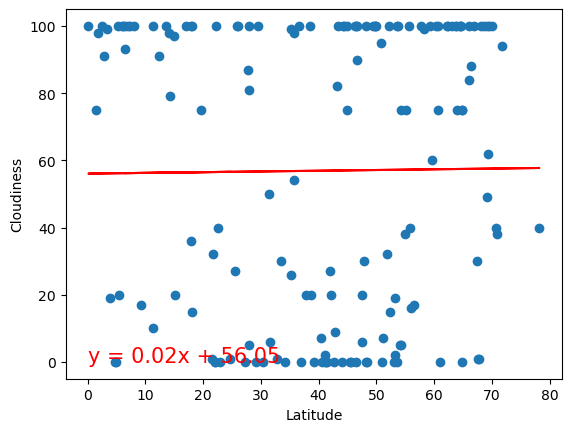

In [44]:
# Northern Hemisphere
build_my_plots(northern_hemi_df, 'Cloudiness')

The r-sqaure is: 0.10740104478255275


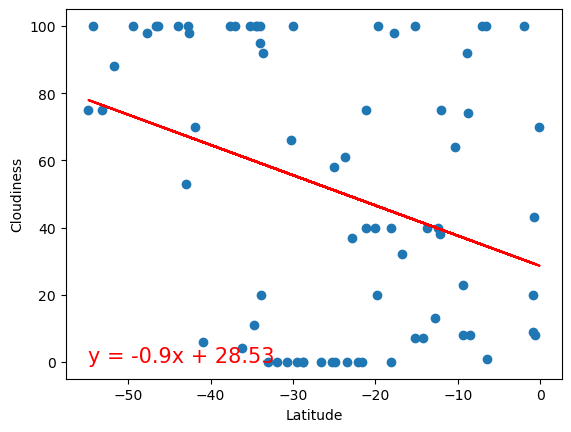

In [45]:
# Southern Hemisphere
build_my_plots(southern_hemi_df, 'Cloudiness')

**Discussion about the linear relationship:** In the linear regression plots above we see an almost even amount of cloudiness with a slight increase in the Northern Hemisphere. Southern Hemisphere has more of a declining correlation of Cloudiness with many outliers.

### Wind Speed vs. Latitude Linear Regression Plot

The r-sqaure is: 0.00827456161565182


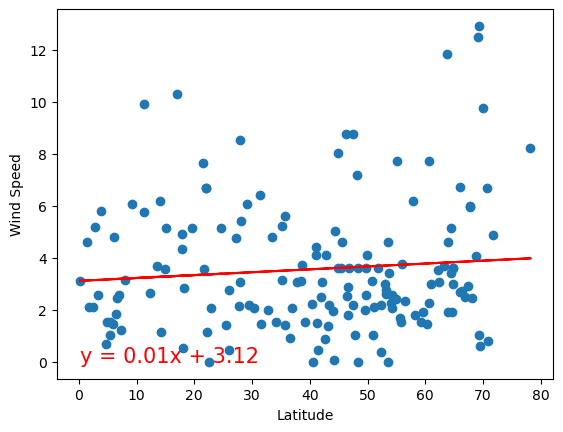

In [46]:
# Northern Hemisphere
build_my_plots(northern_hemi_df, 'Wind Speed')

The r-sqaure is: 0.08615180283976685


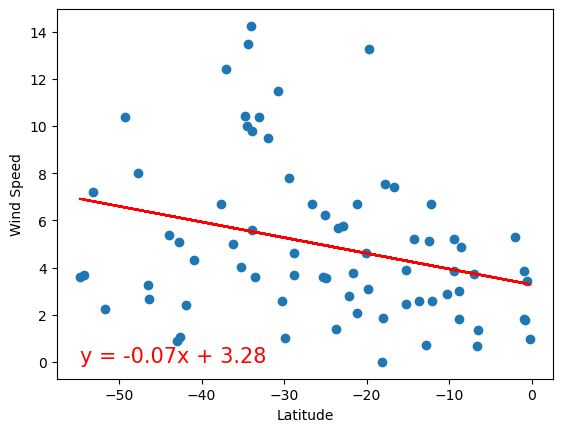

In [47]:
# Southern Hemisphere
build_my_plots(southern_hemi_df, 'Wind Speed')

**Discussion about the linear relationship:** Lastly, shown in the linear regression plot above we see the Wind Speed starting off in Northern Hemisphere lower than the Southern Hemisphere. The Northern Hemisphere is being strongly correlated as the latitude increases the Wind Speed gradually increases aswell. Southern Hemisphere starts off with higher Wind Speeds but strongly starts decreases in Wind Speed as the latitude increases.